# Reasoning Patterns Tutorial

In this tutorial, we demonstrate the usage of our reasoning patterns functions for MAIDs. These implement the graphical criteria for the four reasoning patters found in Avi Pfeffer and Ya’akov Gal's "On the Reasoning Patterns of Agents in Games" (2007). They show that when agents are playing Well-distinguishing strategies (see later), all situations in which an agent cares about its decision can be captured by four reasoning patterns:

- A) Direct Effect 
- B) Manipulation
- C) Signaling
- D) Revealing/Denying

## Background

<div class="alert alert-block alert-info">
<b>Definition:</b> Player $i$'s decision node $D$ is <b>motivated</b> with respect to a set of possible policy profiles, $\Pi$, if there exist actions $d, d' \in \textbf{dom}(D)$, policy profiles $\pi \in \Pi$, and some instantiation of $D$'s parents $\textbf{pa}_D$, such that.

>$\mathcal{U}^i[\pi | Do(d), \textbf{pa}_D] \neq \mathcal{U}^i[\pi | Do(d'), \textbf{pa}_D]$


Note: The "Do(d)" notation is taken from Pearl (2009) - it means that we fix the domain of $D$ to a certain value and remove any edges in the MAID between $D$ and its parents. Therefore, $\mathcal{U}^i[\pi | Do(d), \textbf{pa}_D]$ is the expected utility for player $i$ when $i$ deliberately takes action $d$ at decision node $D$ given that the full policy profile is $\pi$ and the instantiation of $D$'s parents is $\textbf{pa}_D$.
    
 </div>
  

To find these reasoning patterns, Pfeffer and Gal (2007) restrict the set of policies to those where agents only differentiate between actions at a decision if  doing  so  matters  for  their  expected  utility. These policies are called __well-distinguishing (WD) Policies__.

<div class="alert alert-block alert-info">
<b>Definition:</b> Let $\Pi$ be a set of full policy profiles and $\Pi^i_D$ be the set of possible policies at decision $D$ for agent $i$. A policy $\pi^i_D \in \Pi^i_D$ for $D$ is <b>well-distinguishing</b> with respect to $\Pi$ if:

1) $\pi^i_D$ only distinguishes between two different instantiations of the parents of D, $\textbf{pa}_D, \textbf{pa}_D' \in \textbf{dom}(\textbf{Pa}_D)$, (i.e. $\pi^i(D|\textbf{pa}_D) \neq \pi^i(D| \textbf{pa}_D')$) if there exist policies for other players $\pi^{-i} \in \Pi^{-i}$ and a possible action $d \in \textbf{dom}(D)$, such that: $\mathcal{U}^i[\pi | Do(d), \textbf{pa}_D] \neq \mathcal{U}^i[\pi | Do(d), \textbf{pa}_D']$ where $\pi = (\pi^i_D, \pi^i_{-D}, \pi^{-i})$.
    
2) For a given instantiation  of D's parents $\textbf{pa}_D$, $\pi^i_D$ only distinguishes between two different actions $d, d' \in \textbf{dom}(D)$ for $D$ if there exist policies for other players $\pi^{-i} \in \Pi^{-i}$ such that $\mathcal{U}^i[\pi | Do(d), \textbf{pa}_D] \neq \mathcal{U}^i[\pi | Do(d'), \textbf{pa}_D]$ where $\pi = (\pi^i_D, \pi^i_{-D}, \pi^{-i})$.
    
 </div>

Intuition: The first condition says that if, regardless of other play-ers’ policies, two different instantiations of the decisionnode’s parents return the same expected reward to theagent, the policy should not make a distinction betweenthose instantiations. The second says that if, regardless ofother players’ policies, two different action choices at thedecision node return the same expected reward, the pol-icy should not prefer either action over the other.

When all agents are playing WD policies, an agent has a reason to prefer one policy over another because of only four reasoning patterns: direct effect, manipulation,signaling, revealing/denying.

- If one of the four reasoning patterns (listed above) applies to an agent's decision node, that decision node is __effective__. 
- If, instead, no reasoning pattern holds it is __unmotivated__, which means that the agent making that decision has no reason to prefer one action over another. 

If an agent’s decision node is motivated, that decision node is effective; however, if a node is effective, that doesn’t necessary mean it’s motivated. Instead, if a decision node in a MAIM $M$ is effective, then there exists a parameterisation of $M$ such that the decision node is motivated with respect to WD strategies. This is similar to the completeness result for d-connectedness

In [1]:
#importing necessary libraries
%load_ext autoreload
%autoreload 2
%matplotlib inline
%autosave 60
import sys
sys.path.append("..") #TODO: make /cid a package, then delete this
import numpy as np
from core.macid import MACID
from analyze.reasoning_patterns import direct_effect, manipulation, signaling, revealing_or_denying, get_reasoning_patterns


Autosaving every 60 seconds


## Direct Effect

__Intuition__:
> Agent $i$ can directly or in-directly influence their own utility (but not through another agent $j \neq i$’s decision).

__Graphical Criterion__:
> There is a directed decision-free path from $D^i \in \textbf{D}^i$ to a utility node $U^i \in \textbf{U}^i$.

We can use a very simple MAID to show this reasoning pattern:

In [2]:
macid = MACID([('D1', 'U1'), ('D2', 'D1')],
              {1: {'D': ['D1', 'D2'], 'U': ['U1']}})

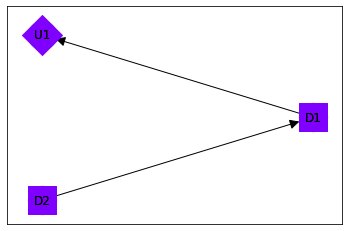

In [3]:
macid.draw()

In [4]:
direct_effect(macid, 'D1')

True

In [5]:
direct_effect(macid, 'D2')

False

In [6]:
get_reasoning_patterns(macid)

{'dir_effect': ['D1'], 'sig': [], 'manip': [], 'rev_den': []}

Agent $1$ takes a decision at $D^1$ which directly affects their utility $U^1$.

## Manipulation

__Intuition__:
> Agent $i$ can exert influence on another agent $j \neq i$, whose utility agent $i$ can affect. Agent $j$ can therefore be manipulated to do what agent $i$ wants them to do, through $i$'s effect on $j$'s utility.

__Graphical Criterion__:
> - There is a directed decision-free path from $D^i \in \textbf{D}^i$ to an effective decision node $D^j \in \textbf{D}^j$.
- There is a directed, effective path from $D^j$ to a utility node $U^i \in \textbf{U}^i$. An effective path is a path in which all decision nodes, except possibly the initial node, are effective.
- There is a directed, effective path from $D^i$ to $U^j \in \textbf{U}^j$ that does not pass through $D^j$.




In [7]:
macid = MACID([('D1', 'U2'), ('D1', 'D2'), ('D2', 'U1'), ('D2', 'U2')],
                       {1: {'D': ['D1'], 'U': ['U1']}, 2: {'D': ['D2'], 'U': ['U2']}})

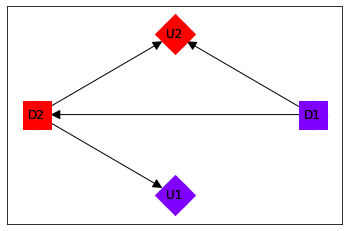

In [8]:
macid.draw()

In [9]:
get_reasoning_patterns(macid)

{'dir_effect': ['D2'], 'sig': [], 'manip': ['D1'], 'rev_den': []}

Agent $1$ can manipulate $2$ because they can affect agent $2$'s utility (the edge $D^1 \rightarrow U^2$). Also, note that 'D2'is effective by direct effect. Since the graphical criterion depends on which other decision nodes are effective, we could have used this information at the outset:

In [10]:
effective_set = ['D2']
manipulation(macid, 'D1', effective_set)

True

Other Examples: seqeutial "battle of the sexes" game, bribery etc

## Signaling

__Intuition__:
> Agent $i$ has access to information that can affect both agent $i$ and $j$’s utility. Therefore, agent $i$ may choose an action to communicate this information to $j$ as clearly as possible to increase both $i$ and $j$'s utility.

__Graphical Criterion__:
> - There is a directed decision-free path from $D^i \in \textbf{D}^i$ to an effective decision node $D^j \in \textbf{D}^j$.
- There is a directed, effective path from $D^j$ to a utility node $U^i \in \textbf{U}^i$.
- Let $U^j \in \textbf{U}^j$. There is an effective back-door path, $\xi$, where:
    $D^i \not\perp U^j | (D^j \cup (\textbf{Pa}_{D^j} \setminus \textbf{Desc}_{D^i})$. A back-door path between $X$ and $Z$ is a path in which the first edge goes into the first node $(X \leftarrow···Z)$.
- If $\mathcal{F}$ is the fork node in $\xi$, there is an effective path $\mathcal{F} \not\perp U^i | (D^i \cup (\textbf{Pa}_{D^i} \setminus \textbf{Desc}_{\mathcal{F}}))$.

The canonical MAID pattern for signaling is shown by:

In [11]:
macid = MACID([('X', 'U1'), ('X', 'U2'),
                ('X', 'D1'), ('D1', 'D2'),
                ('D2', 'U1'), ('D2', 'U2')],
                {1: {'D': ['D1'], 'U': ['U1']}, 2: {'D': ['D2'], 'U': ['U2']}})

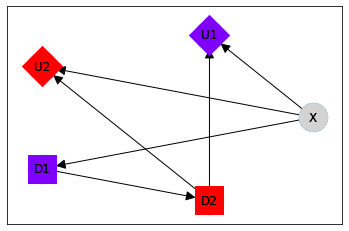

In [12]:
macid.draw()

In [13]:
get_reasoning_patterns(macid)

{'dir_effect': ['D2'], 'sig': ['D1'], 'manip': [], 'rev_den': []}

Agent $1$ knows the value of $X$ before they make their decision at $D^1$. Since the value of $X$ affects both agents' utility, $1$ is motivated to signal what this information is to agent $2$.

Again, since we can spot immediately that 'D2' is effective by direct effect, we can do:

In [14]:
effective_set = ['D2']
signaling(macid, 'D1', effective_set)

True

Other examples include: the game bridge (where you want to signal to your partner what cards you have without being able to explicitly communicate them), CIRL etc

## Revealing/Denying 

__Intuition__:
> Agent $i$ can show or withhold the flow of information $I$ (which $i$ does not know) to another agent $j$. This affects $j$’s decision information context and so may elicit an action made by $j$ which is more favourable for $i$

__Graphical Criterion__:
> - There is a directed decision-free path from $D^i \in \textbf{D}^i$ to an effective decision node $D^j \in \textbf{D}^j$.
- There is a directed, effective path from $D^j$ to a utility node $U^i \in \textbf{U}^i$.
- Let $U^j \in \textbf{U}^j$. There is an effective front-door path, $\xi$, where:
    $D^i \not\perp U^j | (D^j \cup (\textbf{Pa}_{D^j} \setminus \textbf{Desc}_{D^i})$. A front-door path between $X$ and $Z$ is an (undirected) path in which the first edge comes out of the first node ($X \rightarrow···Z$).

We'll introduce another example to introduce this reasoning pattern:

__Fake News Politician Example__ : An election is coming up and a politician can decide whether to tweet a news story which his or her app recommended. The politician doesn't know, or care, whether the story is true or false. In deciding whether to share the news, the politician only cares how this story will affect how the voter votes.

The voter's well-being will be affected by, but the voter is blind to, the truthfulness of the news story. They must decide how to vote based on their twitter feed and other news they read. The voter also has some prior opinion of the politician's reputation which affects how likely they are to believe the politician.

We use the following labels to construct the MACID for this example:

- ToF = True or False (news story)
- TF = Twitter Feed
- O = Other news
- R = (the politician's) reputation
- D1 and U1 are the politician's decision whether to vote or not, and the politician's utility.
- D2 and U2 represent the voting decision of the median voter and their utility.


In [15]:
macid = MACID([('ToF', 'TF'), ('ToF', 'U2'),
                ('O', 'U2'), ('O', 'D2'),
                ('D1', 'TF'), ('TF', 'D2'),
                ('R', 'D2'), ('R', 'U1'),
                ('D2', 'U1'), ('D2', 'U2')],
                {1: {'D': ['D1'], 'U': ['U1']}, 2: {'D': ['D2'], 'U': ['U2']}})

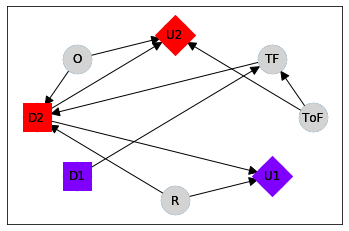

In [16]:
macid.draw()

In [17]:
get_reasoning_patterns(macid)

{'dir_effect': ['D2'], 'sig': [], 'manip': [], 'rev_den': ['D1']}

We first recognise that the voter’s decision is effective by ‘direct effect’; inother words, the voter will vote for the option whichthey expect to maximise their utility. Secondly, we recognise that the politician’s decision to tweet or not is effective by the ‘revealing/denying’ reasoning pattern.

The paramterisation of the system will affect whether we predict that the politician will decide to tweet or not. If the politician has a prior suggesting that tweeting will help him or her in the election, he or she should tweet the news story, but otherwise the politician should not. For example, if the politician believes the voter will currently not vote for them, then they are motivated to tweet the new story because that news story may, if favourable, change the voter's mind. If the politician thinks that the voter is already on their side, they may reason that there is no upside only a potential downside to tweeting. We accept, however, that the reader may think our assumption of agent-rationality is erroneous for predicting the behaviour of real-world politicians!

## References

 Avi Pfeffer and Ya’akov Gal,
On the Reasoning Patterns of Agents in Games,
In AAAI, 2007.

Judea Pearl, Causality,  Cambridge university press, 2009.